In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sexy-pics-cyclone/irma.jpg
/kaggle/input/sexyyyyyyy/trial1.png
/kaggle/input/sexyyyyyy2/trial2.jpg.crdownload
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_0600_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_1530_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_1400_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_1500_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_1200_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_0730_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_0830_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_2200_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_0000_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/3DIMG_07NOV2019_1600_L1C_SGP_vis.tif
/kaggle/input/insat3d-india/INSAT3D_VIS_India/

Is osgeo and gdl dont work try (PIL)

In [2]:
from PIL import Image
import numpy as np
import os

In [3]:
images_tir2=[pos_tif for pos_tif in os.listdir("../input/insat3d-india/INSAT3D_VIS_India") if pos_tif.endswith(".tif")]
images_tir1 = [pos_tif for pos_tif in os.listdir("../input/insat3d-india/INSAT3D_TIR1_India") if pos_tif.endswith('.tif')]
images1=images_tir1
images2=images_tir2

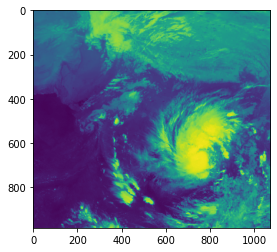

In [4]:
import matplotlib.pyplot as plt
for i in range(len(images_tir1)):
    imm=Image.open("../input/insat3d-india/INSAT3D_TIR1_India/"+str(images1[i]))
    k=np.array(imm)
    images1[i]=k/800
for i in range(len(images_tir2)):
    imm=Image.open("../input/insat3d-india/INSAT3D_VIS_India/"+str(images2[i]))
    k=np.array(imm)
    images2[i]=k/800
plt.imshow(images1[0]/255)

array([[0.00104375, 0.00104531, 0.00104375, ..., 0.00120469, 0.00121094,
        0.0012125 ],
       [0.00104219, 0.00104375, 0.00104375, ..., 0.0012    , 0.0012    ,
        0.0012    ],
       [0.00104062, 0.00104375, 0.00104375, ..., 0.00118906, 0.00118906,
        0.00119219],
       ...,
       [0.00083906, 0.00083906, 0.00083906, ..., 0.00121563, 0.00122656,
        0.00120156],
       [0.00084063, 0.00083906, 0.00083906, ..., 0.00122969, 0.0012375 ,
        0.00122344],
       [0.00084063, 0.00084063, 0.00084063, ..., 0.00120156, 0.00121875,
        0.00124219]], dtype=float32)

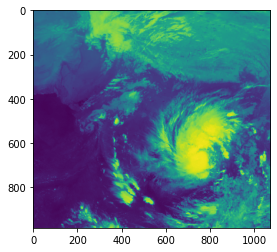

In [5]:
plt.imshow(images1[0]/800)
images1[0]/800

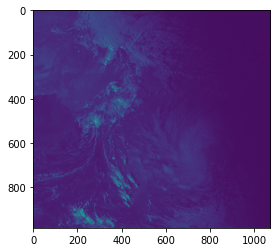

In [6]:
import matplotlib.pyplot as plt
for i in range(len(images2)):
    plt.imshow(images2[i])
    #plt.show()

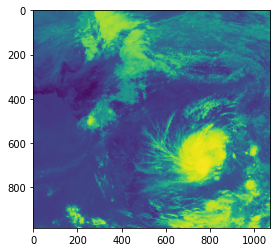

In [7]:
for i in range(len(images1)):
    plt.imshow(images1[i])
    #plt.show()

In [8]:
print(len(images1),len(images2))

45 45


In [9]:
images1[0].shape
(1074*1074)/128**2


70.402587890625

In [10]:
from tensorflow.keras import layers,models

In [11]:
target = [1 for i in range(45)]
target+= [0 for i in range (45)]
images = images1+images2
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(images,target,shuffle = True,test_size = 0.1)


In [12]:
#cnn model
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,activation="relu",kernel_size=(5,5),padding="SAME"),
    layers.MaxPooling2D((4,4)),
    #layers.BatchNormalization(),
    
    layers.Conv2D(filters=32,activation="relu",kernel_size=(4,4)),
    layers.MaxPooling2D((3,3)),
    #layers.BatchNormalization(),
    
    layers.Conv2D(filters=32,activation="relu",kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    #layers.BatchNormalization(),
    
    #dense
    layers.Flatten(input_shape=(984, 1074,1)),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

2022-03-28 20:23:52.297190: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [14]:
xtrain=np.array(xtrain).reshape(-1,984,1074,1)
ytrain=np.array(ytrain)
xtest=np.array(xtest).reshape(-1,984,1074,1)
ytest=np.array(ytest)

ytrain

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [15]:
cnn.fit(xtrain,ytrain,epochs=3)

2022-03-28 20:23:53.130496: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
3/3 [==============================] - 27s 5s/step - loss: 0.5999 - accuracy: 0.5062
Epoch 2/3
3/3 [==============================] - 17s 5s/step - loss: 0.2330 - accuracy: 0.9506
Epoch 3/3
3/3 [==============================] - 17s 5s/step - loss: 0.0092 - accuracy: 1.0000


In [16]:
cnn.evaluate(xtest,ytest)

1/1 [==============================] - 1s 963ms/step - loss: 0.0014 - accuracy: 1.0000


[0.0013677887618541718, 1.0]

In [17]:
#y_pred=cnn.predict(test)
import matplotlib.image as mpimg


In [18]:
path="../input/sexy-pics-cyclone/irma.jpg"
path="../input/sexyyyyyyy/trial1.png"
path="../input/sexyyyyyy2/trial2.jpg.crdownload"

In [19]:
img = mpimg.imread(path)

(250, 350, 3)


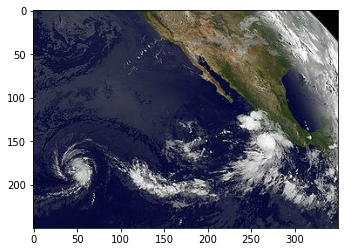

In [20]:
plt.imshow(img)
print(img.shape)
#img=img.reshape(-1,553,800,1)

(1, 984, 1074, 1)

display: unable to open X server `' @ error/display.c/DisplayImageCommand/411.


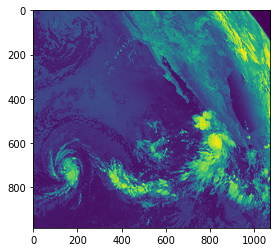

In [21]:
from PIL import Image,ImageOps

# Opens a image in RGB mode
im = Image.open(path)
# Size of the image in pixels (size of original image)
 
# Cropped image of above dimension
# (It will not change original image)
newsize = ( 1074,984)
im1 = im.resize(newsize)
# Shows the image in image viewer
im1.show()
type(im1)
im2 = ImageOps.grayscale(im1)
im1=np.asarray(im2)
im1.shape

im1=im1.reshape((-1,984,1074,1))
plt.imshow(im2)
im1.shape

In [22]:
y_pred=cnn.predict(im1)

In [23]:
y_pred[0][0]//10

0.0